In [1]:
code_folder = '../codes'
import sys
sys.path.append(code_folder)


In [2]:
### Import packages
from rdkit import RDLogger    
from torch_geometric.data import Data
RDLogger.DisableLog('rdApp.*')
from util_gnn import draw_graph
from torch_geometric.data import DataLoader
import torch

In [3]:
### Load data
batch_size = 64
batch_size = 64
mol_data = torch.load('qm9_smiles_noar.pt')
data_list = torch.load('qm9_data_noar.pt')
data_loader = DataLoader(data_list, batch_size=batch_size, shuffle=True, follow_batch=['edge_index', 'y'])

In [8]:
import torch_geometric
print (torch_geometric.__version__)

1.7.2


In [3]:
import os
generator = torch.load('../models/ul_gan_qm9.pt')

ModuleNotFoundError: No module named 'torch_geometric.nn.dense.linear'

In [ ]:
from trainer import generate_noise
from util_molecular import MolFromTorchGraphData, evaluate, MolFromTorchGraphData_enriched


In [ ]:
evaluate_num = 10000
rand_dim = 256

In [ ]:
generator.eval()
with torch.no_grad():
    eval_fake_data = []
    problem_info = []
    for j in range(evaluate_num//batch_size):
        z_rand, z_lr_cont, z_cate, z_cont = generate_noise(device=device, rand_dim=rand_dim)
        z = z_rand
        fake_data, probs = generator(z)
        eval_fake_data.extend([fake_data[j] for j in range(fake_data.batch.max().item() + 1)])
    eval_fake_data = [MolFromTorchGraphData_enriched(j.to('cpu'), node_dim=4, without_aroma=True) for j in eval_fake_data]
    eval_res = evaluate(eval_fake_data, mol_data, eval_two=True)
    print ("Validation, uniqueness, novelty: ", eval_res) 
_ = generator.train()


In [13]:
generator.eval()
all_evals = []
for j in range(100):
    with torch.no_grad():
        eval_fake_data = []
        problem_info = []
        for j in range(evaluate_num//batch_size):
            z_rand, z_lr_cont, z_cate, z_cont = generate_noise(device=device, rand_dim=rand_dim)
            z = z_rand
            fake_data, probs = generator(z)
            eval_fake_data.extend([fake_data[j] for j in range(fake_data.batch.max().item() + 1)])
        eval_fake_data = [MolFromTorchGraphData_enriched(j.to('cpu'), node_dim=4, without_aroma=True) for j in eval_fake_data]
        eval_res = evaluate(eval_fake_data, mol_data, eval_two=True)
        all_evals.append(eval_res)

    

/data/unpool/unpool_layers_simple_v2.py:996: UserWarning: There is no 'use_softmax' attribute in the class, we just use True as default
  warnings.warn("There is no 'use_softmax' attribute in the class, we just use True as default")
/home/miniconda3/envs/gnn/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Uniqueness at 1k, 10k 0.965 0.8290720740577474
Validation, uniqueness, novelty:  (0.9088541666666666, 0.8290720740577474, 0.9485577562142762)
Uniqueness at 1k, 10k 0.969 0.8271550293238906
Validation, uniqueness, novelty:  (0.9051482371794872, 0.8271550293238906, 0.94876254180602)
Uniqueness at 1k, 10k 0.971 0.8255992962392786
Validation, uniqueness, novelty:  (0.9108573717948718, 0.8255992962392786, 0.9499200852424081)
Uniqueness at 1k, 10k 0.967 0.8243273048081164
Validation, uniqueness, novelty:  (0.9082532051282052, 0.8243273048081164, 0.9507692307692308)
Uniqueness at 1k, 10k 0.971 0.8260965883916703
Validation, uniqueness, novelty:  (0.9042467948717948, 0.8260965883916703, 0.9491820863502279)
Uniqueness at 1k, 10k 0.961 0.8322666078128449
Validation, uniqueness, novelty:  (0.9076522435897436, 0.8322666078128449, 0.9497480774330417)
Uniqueness at 1k, 10k 0.97 0.8265609514370664
Validation, uniqueness, novelty:  (0.9095552884615384, 0.8265609514370664, 0.9492406075139888)
Uniquenes

Validation, uniqueness, novelty:  (0.9091546474358975, 0.8298997466123168, 0.948493296163547)
Uniqueness at 1k, 10k 0.967 0.8305592543275633
Validation, uniqueness, novelty:  (0.9026442307692307, 0.8305592543275633, 0.9490981963927856)
Uniqueness at 1k, 10k 0.964 0.8296557811120918
Validation, uniqueness, novelty:  (0.9078525641025641, 0.8296557811120918, 0.9474734042553191)
Uniqueness at 1k, 10k 0.955 0.825096312603192
Validation, uniqueness, novelty:  (0.9099559294871795, 0.825096312603192, 0.9469050160085379)
Uniqueness at 1k, 10k 0.966 0.8247069232470692
Validation, uniqueness, novelty:  (0.9056490384615384, 0.8247069232470692, 0.9487729649993295)
Uniqueness at 1k, 10k 0.962 0.82826278659612
Validation, uniqueness, novelty:  (0.9086538461538461, 0.82826278659612, 0.9491615650785201)
Uniqueness at 1k, 10k 0.969 0.8257265996242679
Validation, uniqueness, novelty:  (0.9063501602564102, 0.8257265996242679, 0.9476713062098501)
Uniqueness at 1k, 10k 0.964 0.8304859108054138
Validation, u

KeyboardInterrupt: 

In [37]:
len(all_evals) # append some additional runs..

100

In [39]:
np.array(all_evals).mean(axis=0).round(3), np.array(all_evals).std(axis=0).round(3)

(array([0.907, 0.826, 0.949]), array([0.003, 0.004, 0.002]))


In [47]:
from rdkit import Chem
eval_valid_data = [Chem.MolFromSmiles(Chem.MolToSmiles(j)) for j in eval_fake_data if Chem.MolFromSmiles(Chem.MolToSmiles(j)) is not None]


4


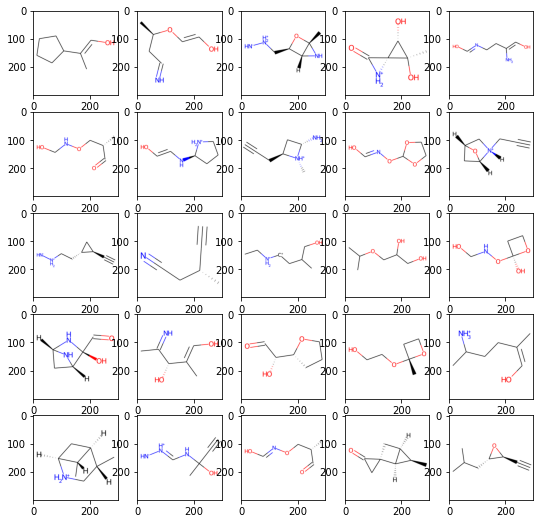

In [53]:
%matplotlib inline
generator.eval()
folder = 'figure_qm9'
from rdkit import Chem
import matplotlib.pyplot as plt
from rdkit.Chem import Draw
epoch = 10
if not os.path.exists(os.path.join(folder, f'fake_ulgan')):
    os.mkdir(os.path.join(folder, f'fake_ulgan'))

fig, ax = plt.subplots(5, 5, figsize=(9, 9))
test_num = np.random.randint(len(eval_fake_data) - 30)
test_num = 4
print (test_num)
for j in range(64):
    fig = Draw.MolToImage(eval_valid_data[test_num + j])
    fig.save(os.path.join(folder, f'fake_ulgan', 'Fake_graph_%d_epoch%d.png' % (j, test_num)))

for i in range(5):
    for j in range(5):
        ax[i, j].imshow(Draw.MolToImage(eval_valid_data[test_num+j+i*5]))

_ = generator.train()


In [61]:
from util_seq_genereation import sequential_generation_va as sequential_generation

In [62]:
z_rand, z_lr_cont, z_cate, z_cont = generate_noise(device=device, rand_dim=256)
z = z_rand

In [69]:
generator.eval()
with torch.no_grad():
    f1, f2, f3, f4 = sequential_generation(generator, z)
_ = generator.train()
f1, f2, f3, f4 = f1.cpu(), f2.cpu(), f3.cpu(), f4.cpu()

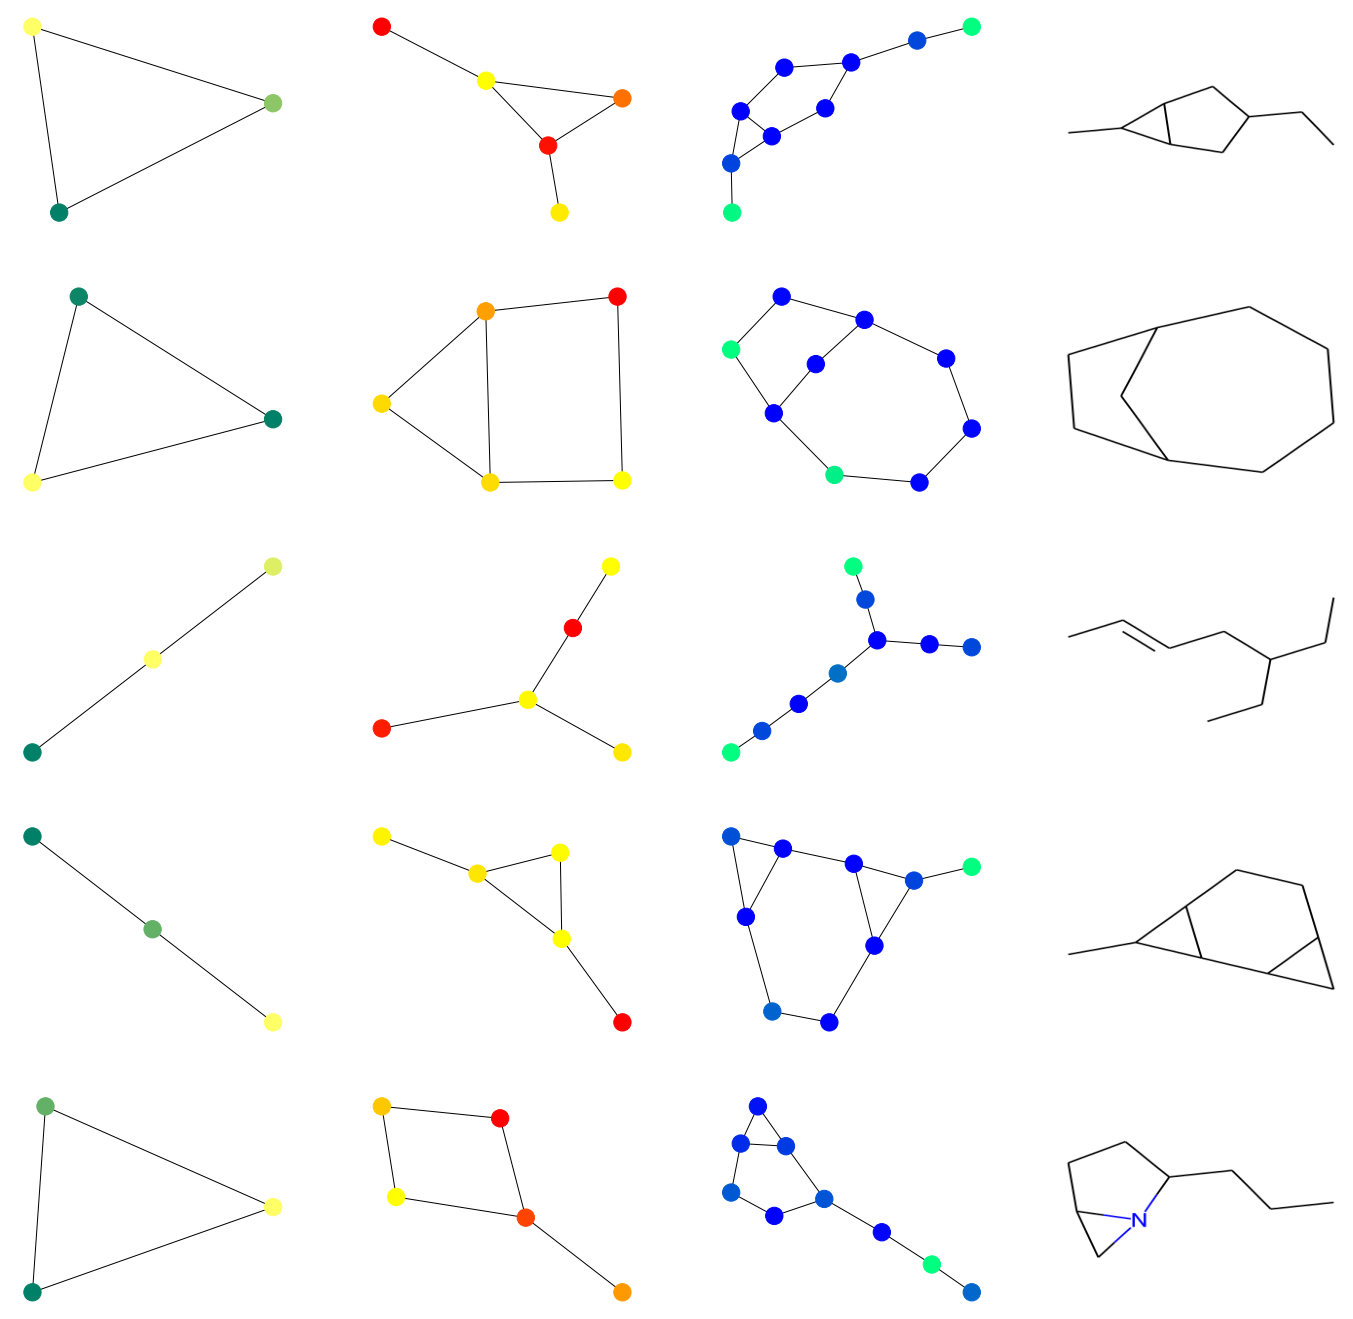

In [71]:

figs, axs = plt.subplots(5, 4, figsize=(24, 24))

for i in range(5):
    j = 0
    draw_graph(f1[i], node_code=False, ax=axs[i, j], cmaps='summer', node_size=50, )
    j = 1
    draw_graph(f2[i], node_code=False, ax=axs[i, j], cmaps='autumn', node_size=50)
    j = 2
    draw_graph(f3[i], node_code=False, ax=axs[i, j], cmaps='winter', node_size=50)
    j = 3
    axs[i, j].imshow(Draw.MolToImage(MolFromTorchGraphData(f4[i])), aspect='auto')
    axs[i, j].set_axis_off()
    
